In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

**Paquetes iniciales a cargar**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
# pip install wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Carga del Dataset**

In [ ]:
#data = pd.ExcelFile('/content/drive/MyDrive/DSRP-Proyecto_PRONABEC-NLP/Dataset_PRONABEC_160.xlsx')
data = pd.ExcelFile('/content/Dataset_PRONABEC_160.xlsx')

df1 = data.parse(0)
print(df1)

                                               Opinión Percerpción  Etiqueta
0    A los jóvenes esta beca ya les cambió la vida ...    Positivo         1
1    En el caso de ellos tanto la educación como la...    Positivo         1
2    Yo creo que el principal impacto es personal. ...    Positivo         1
3    En el instituto a veces los profesores nos dic...    Negativo         0
4    La mayor parte del tiempo lo pasamos entre nos...    Negativo         0
..                                                 ...         ...       ...
155  Ahora, están muy motivados. Antes de Beca 18, ...    Positivo         1
156  Los jóvenes becarios se sienten muy contentos ...    Positivo         1
157  Quiero ser profesional, sobresalir, Beca 18 me...    Positivo         1
158  Cuando no existía Beca 18, las jóvenes estudia...    Positivo         1
159  Los gestores, bien, nos ayudan bastante, están...    Positivo         1

[160 rows x 3 columns]


In [ ]:
df1["Opinión"][0]

'A los jóvenes esta beca ya les cambió la vida totalmente, terminen o no terminen, ya hay un impacto positivo sobre sus condiciones de origen.'

**NUBE DE PALABRAS ANTES DE TODO PREPROCESAMIENTO:**

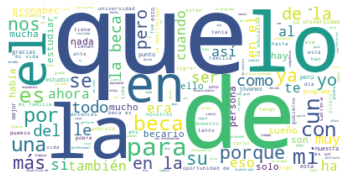

In [ ]:
# NUBE DE PALABRAS ANTES DE TODO PREPROCESAMIENTO:
opiniones = ' '.join(df1.Opinión)
opiniones_minusc = opiniones.lower()

cloud_0 = WordCloud(background_color='white').generate(opiniones_minusc)
plt.imshow(cloud_0, interpolation='bilinear')
plt.axis('off')
plt.show()

**Definición de StopWords**

In [ ]:
# STOPWORDS
stopword_es = nltk.corpus.stopwords.words('spanish') # stopword_es = stopwords.words('spanish')
print(stopword_es)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

**NUBE DE PALABRAS DESPUÉS DE PREPROCESAMIENTO:**


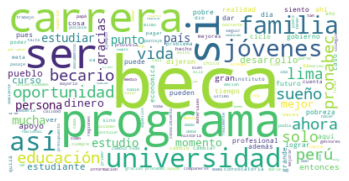

In [ ]:
# NUBE DE PALABRAS DESPUÉS DE PREPROCESAMIENTO:
cloud_1 = WordCloud(regexp= r'\b[^\d\W][^\d\W]+\b', background_color='white', stopwords=stopword_es).generate(opiniones_minusc)
plt.imshow(cloud_1, interpolation='bilinear')
plt.axis('off')
plt.show()

**Bag of Words obetenido mediante CountVectorizer()**

In [ ]:
# 1. BAG OF WORDS - CountVectorizer()
vect = CountVectorizer(token_pattern= r'\b[^\d\W][^\d\W]+\b', stop_words = stopword_es)
vect.fit(df1.Opinión)
pares_vectores_bow = vect.transform(df1.Opinión)
BOW = pd.DataFrame(pares_vectores_bow.toarray(), columns=vect.get_feature_names())
print(BOW)
BOW['etiqueta'] = df1.Etiqueta
print(BOW)

     abancay  abandono  abierto  abril  ...  último  últimos  única  único
0          0         0        0      0  ...       0        0      0      0
1          0         0        0      0  ...       0        0      0      0
2          0         0        0      0  ...       0        0      0      0
3          0         0        0      0  ...       0        0      0      0
4          0         0        0      0  ...       0        0      0      0
..       ...       ...      ...    ...  ...     ...      ...    ...    ...
155        0         0        0      0  ...       0        0      0      0
156        0         0        0      0  ...       0        0      0      0
157        0         0        0      0  ...       0        0      0      0
158        0         0        0      0  ...       0        0      0      0
159        0         0        0      0  ...       0        0      0      0

[160 rows x 1720 columns]
     abancay  abandono  abierto  abril  ...  últimos  única  único  etiqu

**Regresión Logística | Bag of Words - CountVectorizer() | Accuracy y Matriz de Confusión**

In [ ]:
# DEFINIR "X" - "y" | REGRESIÓN LOGÍSTICA | BAG OF WORDS - CountVectorizer()
y_BOW = BOW.etiqueta
X_BOW = BOW.drop('etiqueta', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_BOW, y_BOW, test_size=0.35, random_state=123, stratify=y_BOW)
log_reg_BOW = LogisticRegression().fit(X_train, y_train)
y_test_predicted = log_reg_BOW.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_test_predicted), 2))
print('2. Confusion matrix of test data: \n', confusion_matrix(y_test, y_test_predicted))
print('3. Confusion matrix of test data: \n', confusion_matrix(y_test, y_test_predicted)/len(y_test))

1. Accuracy on the test set:  0.88
2. Confusion matrix of test data: 
 [[24  4]
 [ 3 25]]
3. Confusion matrix of test data: 
 [[0.42857143 0.07142857]
 [0.05357143 0.44642857]]


**Bag of Words obetenido mediante TfidVectorizer()**

In [ ]:
# 2. BAG OF WORDS - TfidfVectorizer()
vect = TfidfVectorizer(token_pattern= r'\b[^\d\W][^\d\W]+\b', stop_words = stopword_es)
vect.fit(df1.Opinión)
pares_vectores_TD_VECT = vect.transform(df1.Opinión)
TD_VECT = pd.DataFrame(pares_vectores_TD_VECT.toarray(), columns=vect.get_feature_names())
print(TD_VECT)
TD_VECT['etiqueta'] = df1.Etiqueta
print(TD_VECT)

     abancay  abandono  abierto  abril  ...  último  últimos  única  único
0        0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
1        0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
2        0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
3        0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
4        0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
..       ...       ...      ...    ...  ...     ...      ...    ...    ...
155      0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
156      0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
157      0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
158      0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
159      0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0

[160 rows x 1720 columns]
     abancay  abandono  abierto  abril  ...  últimos  única  único  etiqu

**Regresión Logística | Bag of Words - TdIdf() | Accuracy y Matriz de Confusión**

In [ ]:
# DEFINIR "X" - "y" | REGRESIÓN LOGÍSTICA | BAG OF WORDS - TfidfVectorizer()
y_TD_VECT = TD_VECT.etiqueta
X_TD_VECT = TD_VECT.drop('etiqueta', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_TD_VECT, y_TD_VECT, test_size=0.35, random_state=123, stratify=y_BOW)

log_reg_TD_VECT = LogisticRegression().fit(X_train, y_train)
y_predicted = log_reg_TD_VECT.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted),2))
print('2. Confusion matrix of test data: \n', confusion_matrix(y_test, y_predicted))
print('3. Confusion matrix of test data: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

1. Accuracy on the test set:  0.86
2. Confusion matrix of test data: 
 [[25  3]
 [ 5 23]]
3. Confusion matrix of test data: 
 [[0.44642857 0.05357143]
 [0.08928571 0.41071429]]


# Prueba de otros métodos de preprocesamiento de los textos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import re
from nltk.stem import SnowballStemmer

In [ ]:
textos_originales = list(df1.Opinión.values)

In [ ]:
etiquetas= list(df1.Etiqueta.values)

In [ ]:
print(textos_originales)

['A los jóvenes esta beca ya les cambió la vida totalmente, terminen o no terminen, ya hay un impacto positivo sobre sus condiciones de origen.', 'En el caso de ellos tanto la educación como la economía ya se está mejorando porque a mitad de carrera ellos ya pueden trabajar o practicar, y no va a ser un subempleo, va a ser un empleo. Entonces, yo creo que ya se les cambió la vida a todos ellos.', 'Yo creo que el principal impacto es personal. Es un su formación personal. Este es un modelo que vale la pena ser aplicado a otros becarios. Hay algunos chicos que sí vienen con la intención de iniciar su carrera y terminarla con éxito. Beca 18 les da la oportunidad de que estudien una carrera en las mejores universidades, en institutos reconocidos, cosa que no hubieran tenido si no hubieran salido de sus regiones.', 'En el instituto a veces los profesores nos dicen que no tenemos creatividad. Que los estudiantes de Lima son mejores y que nos falta capacidad creativa.', 'La mayor parte del ti

In [ ]:
dataset = pd.DataFrame(textos_originales, columns=['txt_original'])
dataset['etiqueta'] = etiquetas

dataset.head(20)

,txt_original,etiqueta
0,A los jóvenes esta beca ya les cambió la vida ...,1
1,En el caso de ellos tanto la educación como la...,1
2,Yo creo que el principal impacto es personal. ...,1
3,En el instituto a veces los profesores nos dic...,0
4,La mayor parte del tiempo lo pasamos entre nos...,0
5,"Y también, por ejemplo, en la calle, en las ti...",0
6,"Ellos, los tutores, te brindan asesorías en la...",0
7,"Es chistoso, porque cuando tu firmas tu compro...",0
8,Lo que nos da el Pronabec es 250 para material...,0
9,Las enfermedades no eran problema porque los c...,0


In [ ]:
textos_procesados = []
for txt in textos_originales:
  txt_proc = txt.lower()
  txt_proc = re.sub(r'\n', ' ', txt_proc)
  txt_proc = re.sub(r's/', '', txt_proc)
  txt_proc = re.sub(r'[\.,\'\]\[\"?!“”;%\(\)/:]', '', txt_proc)
  txt_proc = re.sub(r'\d+', '', txt_proc)
  txt_proc = re.sub(r' +', ' ', txt_proc)

  textos_procesados.append(txt_proc)

for txt in textos_procesados:
  print(txt)

a los jóvenes esta beca ya les cambió la vida totalmente terminen o no terminen ya hay un impacto positivo sobre sus condiciones de origen
en el caso de ellos tanto la educación como la economía ya se está mejorando porque a mitad de carrera ellos ya pueden trabajar o practicar y no va a ser un subempleo va a ser un empleo entonces yo creo que ya se les cambió la vida a todos ellos
yo creo que el principal impacto es personal es un su formación personal este es un modelo que vale la pena ser aplicado a otros becarios hay algunos chicos que sí vienen con la intención de iniciar su carrera y terminarla con éxito beca les da la oportunidad de que estudien una carrera en las mejores universidades en institutos reconocidos cosa que no hubieran tenido si no hubieran salido de sus regiones
en el instituto a veces los profesores nos dicen que no tenemos creatividad que los estudiantes de lima son mejores y que nos falta capacidad creativa
la mayor parte del tiempo lo pasamos entre nosotros con

In [ ]:
textos_procesados_sin_stopwords = []
for txtp in textos_procesados:
  list_words = txtp.split(' ')
  txt_proc_sin_stopwords = [word for word in list_words if word not in stopword_es]

  txt_temp = ''
  for i, tpssw in enumerate(txt_proc_sin_stopwords):
    if i != len(txt_proc_sin_stopwords) - 1:
      txt_temp += tpssw + ' '
    else:
      txt_temp += tpssw
  textos_procesados_sin_stopwords.append(txt_temp)

for txt in textos_procesados_sin_stopwords:
  print(txt)

jóvenes beca cambió vida totalmente terminen terminen impacto positivo condiciones origen
caso educación economía mejorando mitad carrera pueden trabajar practicar va ser subempleo va ser empleo entonces creo cambió vida
creo principal impacto personal formación personal modelo vale pena ser aplicado becarios chicos vienen intención iniciar carrera terminarla éxito beca da oportunidad estudien carrera mejores universidades institutos reconocidos cosa si salido regiones
instituto veces profesores dicen creatividad estudiantes lima mejores falta capacidad creativa
mayor parte tiempo pasamos demás chicos universidad relacionamos sé piensan menos sé siento así
ejemplo calle tiendas miran cabeza pies diciéndote… sé creo universidad miran así calles carros ejemplo principio dominábamos castellano entonces leíamos hablábamos así clase chicos compañeros reían burlaban
tutores brindan asesorías preguntan oye ¿cómo necesitan asesorías cursos fuertes repaso así
chistoso firmas compromiso beca dic

In [ ]:
# Stemming con Snowball stemmers developed by Martin Porter
stemmer = SnowballStemmer("spanish")

textos_procesados_sin_stopwords_con_stemming = []
for txtp in textos_procesados_sin_stopwords:
  list_words = txtp.split(' ')
  txt_proc_sin_stopwords_con_stemming = [stemmer .stem(word) for word in list_words]

  txt_temp = ''
  for i, tpsswcl in enumerate(txt_proc_sin_stopwords_con_stemming):
    if i != len(txt_proc_sin_stopwords_con_stemming) - 1:
      txt_temp += tpsswcl + ' '
    else:
      txt_temp += tpsswcl
  textos_procesados_sin_stopwords_con_stemming .append(txt_temp)

for txt in textos_procesados_sin_stopwords_con_stemming:
  print(txt)

joven bec camb vid total termin termin impact posit condicion orig
cas educ econom mejor mit carrer pued trabaj practic va ser subemple va ser emple entonc cre camb vid
cre principal impact personal formacion personal model val pen ser aplic becari chic vien intencion inici carrer termin exit bec da oportun estudi carrer mejor univers institut reconoc cos si sal region
institut vec profesor dic creativ estudi lim mejor falt capac creativ
mayor part tiemp pas demas chic univers relacion se piens men se sient asi
ejempl call tiend mir cabez pies diciendote… se cre univers mir asi call carr ejempl principi domin castellan entonc lei habl asi clas chic compañer rei burl
tutor brind asesor pregunt oye ¿com necesit asesor curs fuert repas asi
chistos firm compromis bec dic vam dar asi noch mañan public chic van recib ingles usted pag mism universidad… ¿y ahor sol univers cost cicl mil pic presupuest da bec 
da pronabec material vec alcanz realid compr tel entonc hac mayor trat ahorr cos pod 

In [ ]:
### SELECCIONAR UN TIPO DE VECTORIZACIÓN Y PROCESAMIENTO, LUEGO EJECUTAR TODO DE NUEVO PARA OBTENER DIFERENTES COMBINACIONES
vectorizer = TfidfVectorizer()
#vectorizer = CountVectorizer()

#X = vectorizer.fit_transform(textos_procesados)
X = vectorizer.fit_transform(textos_procesados_sin_stopwords)
#X = vectorizer.fit_transform(textos_procesados_sin_stopwords_con_stemming)

y = dataset.etiqueta

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Prueba de otros modelos de clasificación binaria

**1. Modelo de Regresión logística**

In [ ]:
modelo_regresion_logistica = LogisticRegression(random_state=0)
modelo_regresion_logistica.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predicted_train = modelo_regresion_logistica.predict(X_train)
print('1. Accuracy on the test set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the test set:  1.0


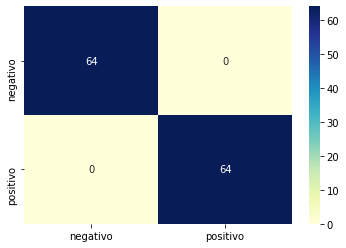

In [ ]:
cm_train = confusion_matrix(y_train, y_predicted_train)
df_cm_train = pd.DataFrame(cm_train, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_train, annot=True, cmap="YlGnBu") # font size
plt.show()

In [ ]:
y_predicted_test = modelo_regresion_logistica.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.91


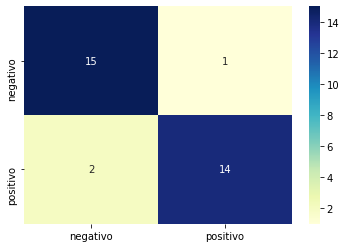

In [ ]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()

**2. Modelo de Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
modelo_naive_bayes = BernoulliNB()
modelo_naive_bayes.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
y_predicted_train = modelo_naive_bayes.predict(X_train)
print('1. Accuracy on the test set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the test set:  1.0


In [ ]:
y_predicted_test = modelo_naive_bayes.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.88


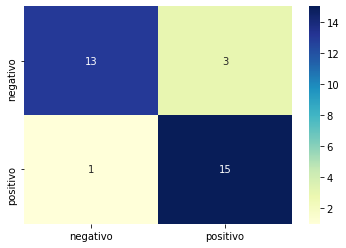

In [ ]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()

**3. Modelo de Support Vector Machine (SVM)**

In [ ]:
from sklearn import svm

modelo_svm = svm.SVC()
modelo_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predicted_train = modelo_svm.predict(X_train)
print('1. Accuracy on the test set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the test set:  1.0


In [ ]:
y_predicted_test = modelo_svm.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.84


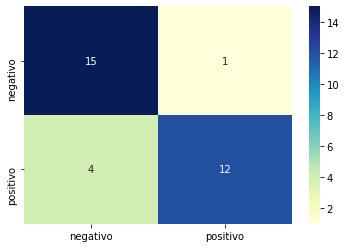

In [ ]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()

**4. Modelo de Nu-Support Vector Classification (NuSVC)**

In [ ]:
from sklearn import svm

modelo_nusvc = svm.NuSVC()
modelo_nusvc.fit(X_train, y_train)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [ ]:
y_predicted_train = modelo_nusvc.predict(X_train)
print('1. Accuracy on the test set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the test set:  1.0


In [ ]:
y_predicted_test = modelo_nusvc.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.91


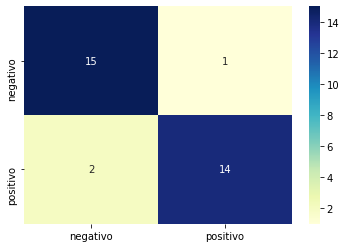

In [ ]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()

**5. Modelo de Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_random_forest = RandomForestClassifier(max_depth=20, random_state=0)
modelo_random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_predicted_train = modelo_random_forest.predict(X_train)
print('1. Accuracy on the test set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the test set:  0.99


In [ ]:
y_predicted_test = modelo_random_forest.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.88


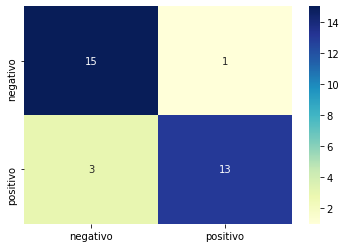

In [ ]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()

**6. Modelo de Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_grad_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
modelo_grad_boosting.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_predicted_train = modelo_grad_boosting.predict(X_train)
print('1. Accuracy on the test set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the test set:  1.0


In [ ]:
y_predicted_test = modelo_grad_boosting.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.84


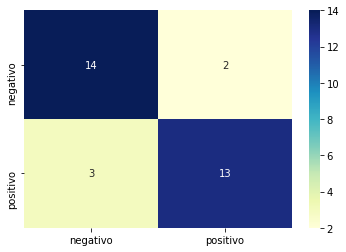

In [ ]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()

**7. Modelo de Ada Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

modelo_ada_boosting = AdaBoostClassifier(n_estimators=100, random_state=0)
modelo_ada_boosting.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [ ]:
y_predicted_train = modelo_ada_boosting.predict(X_train)
print('1. Accuracy on the test set: ', round(accuracy_score(y_train, y_predicted_train),2))

1. Accuracy on the test set:  1.0


In [ ]:
y_predicted_test = modelo_ada_boosting.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted_test),2))

1. Accuracy on the test set:  0.88


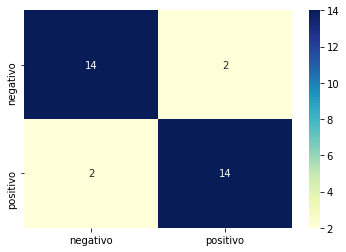

In [ ]:
cm_test = confusion_matrix(y_test, y_predicted_test)
df_cm_test = pd.DataFrame(cm_test, ['negativo', 'positivo'], ['negativo', 'positivo'])

sn.heatmap(df_cm_test, annot=True, cmap="YlGnBu") # font size
plt.show()